In [1]:
# project: p1
# submitter: kxia7
# partner: none
# hours: 7.5

In [2]:
import json
import os
import pandas
import matplotlib
import subprocess
import time
matplotlib.rcParams["font.size"] = 16

## Review 220: Control Flow (Part 1)

In [3]:
#q1
type(7/2)

float

In [4]:
#q2
x = 4
maximum = 10
minimum = 5
error = x <= minimum or x>= maximum # True if x is outside the minimum-to-maximum range
error

True

In [5]:
#q3
word = "KAFKAESQUE"
suffix_match = word.lower()[-5:] == 'esque' # .endswith(...) method not allowed for this question! (practice slicing)
suffix_match


True

In [6]:
def add(x, y=1):
    return x+y

In [7]:
#q4
add(3, 4)

7

In [8]:
#q5
add(9)

10

In [9]:
#q6
x = 4
if x<0:
    status = "negative"
elif x>0:
    status = "positive"
else:
    status = "zero"
status

'positive'

In [10]:
def smart_count(nums):
    total=0
    for num in nums:
        if num > 10:
            continue
        elif num < 0:
            break
        else:
            total += num
    return total

In [11]:
nums = [3, 4, 1, 6]
for x in nums:
    print(x)
    

3
4
1
6


In [12]:
#q7
smart_count(nums)

14

In [13]:
#q8
smart_count([2, 1, 11, 3, 15, -1, 8, 2])

6

## Review 220: State (Part 2)

In [14]:
header = ["A", "B", "C"]

coord1 = {"x": 8, "y": 5}
coord2 = {"x": 9, "y": 2}
coord3 = {"x": 3, "y": 1}

rows = [
    [1, 6, coord1],
    [3, 4, coord2],
    [5, 2, coord3],
]


In [15]:
#q9
coord3['z'] = 3.14
rows

[[1, 6, {'x': 8, 'y': 5}],
 [3, 4, {'x': 9, 'y': 2}],
 [5, 2, {'x': 3, 'y': 1, 'z': 3.14}]]

In [16]:
#q10
rows[0][-1]['x']

8

In [17]:
#q11
import copy
v2 = copy.copy(rows)
v2[0] = 8888    # first change
v2[1][1] = 9999 # second change

rows

[[1, 6, {'x': 8, 'y': 5}],
 [3, 9999, {'x': 9, 'y': 2}],
 [5, 2, {'x': 3, 'y': 1, 'z': 3.14}]]

In [18]:
#q12
b_index = header.index('B')
B_sum = 0
for row in rows:
    B_sum += row[b_index]
B_sum

10007

In [19]:
#q13
rows.sort(key=lambda row: row[header.index('B')], reverse=False)
rows

[[5, 2, {'x': 3, 'y': 1, 'z': 3.14}],
 [1, 6, {'x': 8, 'y': 5}],
 [3, 9999, {'x': 9, 'y': 2}]]

In [20]:
#q14
f = open('usd.json')
data = json.load(f)
f.close()

usd = 400
eqv_eur = data['eur']['rate']*usd
eqv_eur

338.548621199016

In [21]:
def divide(x, y):
    try:
        return x/y
    except ZeroDivisionError:
        return float('nan')

In [22]:
#q15
divide(3, 2)

1.5

In [23]:
#q16
divide(-3, 0)

nan

## Review 220: Data Science (Part 3)

In [24]:
years={}
csv_dir = 'home-computers'
csv_files = os.listdir(csv_dir)

for each in csv_files:
    if not each.startswith('.'):
        pos = each.index('.')
        year = int(each[pos-4:pos])
        df = pandas.read_csv(os.path.join(csv_dir, each), skiprows=1)
        years[year] = df


In [25]:
#q17
sorted(years.keys())

[2013, 2014, 2015, 2016, 2017, 2018]

In [26]:
#q18
wis=years[2018]['Geographic Area Name']=='Wisconsin'
int(years[2018]['Estimate!!Total'][wis])

2371960

In [27]:
#q19
years[2018]['Estimate!!Total!!No Computer'].sum()

10285814

In [28]:
#q20
(years[2018]['Margin of Error!!Total!!No Computer']/years[2018]['Estimate!!Total!!No Computer']).max()

0.12375641594322287

In [29]:
years[2018]

,id,Geographic Area Name,Estimate!!Total,Margin of Error!!Total,Estimate!!Total!!Has one or more types of computing devices,Margin of Error!!Total!!Has one or more types of computing devices,Estimate!!Total!!Has one or more types of computing devices!!Desktop or laptop,Margin of Error!!Total!!Has one or more types of computing devices!!Desktop or laptop,Estimate!!Total!!Has one or more types of computing devices!!Desktop or laptop!!Desktop or laptop with no other type of computing device,Margin of Error!!Total!!Has one or more types of computing devices!!Desktop or laptop!!Desktop or laptop with no other type of computing device,...,Estimate!!Total!!Has one or more types of computing devices!!Tablet or other portable wireless computer,Margin of Error!!Total!!Has one or more types of computing devices!!Tablet or other portable wireless computer,Estimate!!Total!!Has one or more types of computing devices!!Tablet or other portable wireless computer!!Tablet or other portable wireless computer with no other type of computing device,Margin of Error!!Total!!Has one or more types of computing devices!!Tablet or other portable wireless computer!!Tablet or other portable wireless computer with no other type of computing device,Estimate!!Total!!Has one or more types of computing devices!!Other computer,Margin of Error!!Total!!Has one or more types of computing devices!!Other computer,Estimate!!Total!!Has one or more types of computing devices!!Other computer!!Other computer with no other type of computing device,Margin of Error!!Total!!Has one or more types of computing devices!!Other computer!!Other computer with no other type of computing device,Estimate!!Total!!No Computer,Margin of Error!!Total!!No Computer
0,0400000US01,Alabama,1855184,11821,1617364,12859,1251730,14087,78610,4617,...,1024086,15036,21609,2290,41421,3682,451,274,237820,7948
1,0400000US02,Alaska,254551,3266,243428,3328,204652,4223,8530,1197,...,169208,4339,1513,454,11651,1563,12,21,11123,1271
2,0400000US04,Arizona,2614298,11305,2437343,11872,2089711,13603,108836,4849,...,1671375,13995,19310,2151,73865,4430,396,296,176955,6315
3,0400000US05,Arkansas,1156347,7393,1024166,8702,779517,10504,50624,3721,...,621341,9713,9697,1554,20362,2455,262,196,132181,5951
4,0400000US06,California,13072122,21485,12339422,22810,10732212,27904,429488,10497,...,8688262,31722,90611,4577,473702,9988,2725,686,732700,12803
5,0400000US08,Colorado,2176757,7548,2056401,9463,1823335,11384,87081,4109,...,1456499,13943,15304,2091,51153,2909,728,430,120356,5556
6,0400000US09,Connecticut,1378091,6923,1271850,8759,1100001,11070,62229,3401,...,893599,9995,15176,1799,33025,2776,164,159,106241,5097
7,0400000US10,Delaware,367671,3933,341417,4894,275420,5845,17218,1764,...,225185,6086,3723,877,9031,1321,6,12,26254,2355
8,0400000US11,District of Columbia,287476,2752,266613,3420,230574,4069,6223,1303,...,186192,4078,2664,828,7322,1448,0,213,20863,2403
9,0400000US12,Florida,7809358,20825,7282429,23526,6239017,28692,343461,9895,...,4865483,32211,64962,3198,264393,9675,1678,523,526929,12589


In [30]:
#q21
states = ['Illinois', 'Indiana', 'Iowa', 'Michigan', 'Minnesota', 'Wisconsin']
select = years[2018]['Geographic Area Name'].isin(states)
states_df = years[2018][select]

percent_no_computer = 100*states_df['Estimate!!Total!!No Computer']/states_df['Estimate!!Total']
result = pandas.Series(data=percent_no_computer.values ,index=states_df['Geographic Area Name'])
result.to_dict()

{'Illinois': 8.524143737625554,
 'Indiana': 9.463486214247707,
 'Iowa': 9.468929459023103,
 'Michigan': 8.936374942955922,
 'Minnesota': 7.491847623005652,
 'Wisconsin': 9.582497175331794}

<AxesSubplot:xlabel='Geographic Area Name', ylabel='% of Households w/o Computers'>

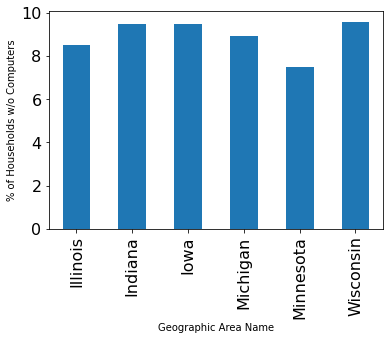

In [31]:
#q22
result.plot.bar(fontsize=16, ylabel='% of Households w/o Computers')

<AxesSubplot:xlabel='Year', ylabel='WI Households without\nComputers (thoudsands)'>

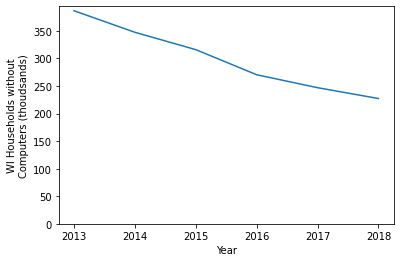

In [32]:
#q23
wisc_no_computer={}
for year in sorted(years.keys()):
    wis=years[year]['Geographic Area Name']=='Wisconsin'
    wisc_no_computer[year] = int(years[year]['Estimate!!Total!!No Computer'][wis])/1e3

s = pandas.Series(data=wisc_no_computer)
s.plot.line(xlabel = 'Year', ylabel = 'WI Households without\nComputers (thoudsands)', ylim=0)

<AxesSubplot:xlabel='Smartphones (millions)', ylabel='Tablets (millions)'>

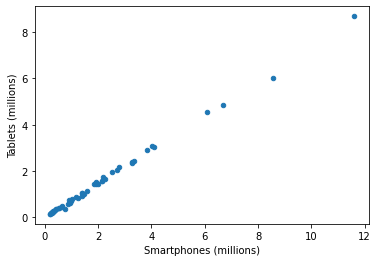

In [33]:
#q24
tablets = years[2018]['Estimate!!Total!!Has one or more types of computing devices!!Tablet or other portable wireless computer']/1e6
smartphones = years[2018]['Estimate!!Total!!Has one or more types of computing devices!!Smartphone']/1e6

d = {'Smartphones (millions)': smartphones, 'Tablets (millions)': tablets}
s = pandas.DataFrame(data=d)
s.plot.scatter(x='Smartphones (millions)', y='Tablets (millions)')

In [34]:
if not os.path.exists('cs320-p1'):
    subprocess.check_output(['git', 'clone', 'https://github.com/tylerharter/cs320-p1.git'])

In [35]:
#q25
log_output = subprocess.check_output(['git', 'log'], cwd='./cs320-p1')
log_output = str(log_output, 'utf-8').split('\n')

log_output[0]

'commit 4e4128313b8d5b5e5d04f2e8e585f64f7c5831a4'

In [36]:
#q26
commit_num=[]
for each in log_output:
    if each.startswith('commit'):
        index = len('commit')+1
        commit_num.append(each[index:])
commit_num

['4e4128313b8d5b5e5d04f2e8e585f64f7c5831a4',
 'f637df3f45bc389e1035cc3aadcf5d81a55f0dc4',
 'c10b5a6cb4f06c96f6f221df2d5ec33af767d5c5',
 'f37e610ce055a3d894baac2d9449e6eb77c72320',
 '6f5ca9327e986315ffcacddce5d9d6195c0913b7',
 '761627a3ad9ee681f27211326e9149f01764ceee',
 'b0df6dbe111f9e28fc3a9c9b841cde5c20c365f9',
 '6d7beafb8e79b7a92fed8e67673a33bb7f607dbe']

In [37]:
#q27
length={}
for each in commit_num:
    subprocess.check_output(['git', 'checkout', each], cwd='./cs320-p1', stderr=subprocess.DEVNULL)
    f = open('./cs320-p1/wc.py')
    lines = list(f)
    f.close()
    length[each] = len(lines)

subprocess.check_output(['git', 'checkout', 'main'], cwd='./cs320-p1', stderr=subprocess.DEVNULL)# return to most recent commit
length

{'4e4128313b8d5b5e5d04f2e8e585f64f7c5831a4': 43,
 'f637df3f45bc389e1035cc3aadcf5d81a55f0dc4': 40,
 'c10b5a6cb4f06c96f6f221df2d5ec33af767d5c5': 40,
 'f37e610ce055a3d894baac2d9449e6eb77c72320': 40,
 '6f5ca9327e986315ffcacddce5d9d6195c0913b7': 39,
 '761627a3ad9ee681f27211326e9149f01764ceee': 35,
 'b0df6dbe111f9e28fc3a9c9b841cde5c20c365f9': 35,
 '6d7beafb8e79b7a92fed8e67673a33bb7f607dbe': 21}

In [38]:
#q28
f = open('input.txt', 'w')
f.write('A B C C')
f.close()

count = subprocess.check_output(['python3', 'cs320-p1/wc.py', 'input.txt', 'ALL'])
count = json.loads(count)
count

{'A': 1, 'B': 1, 'C': 2}

In [39]:
#q29
failed_commit = []
for each in commit_num:
    try:
        subprocess.check_output(['git', 'checkout', each], cwd='./cs320-p1', stderr=subprocess.DEVNULL)
        subprocess.check_output(['python3', 'cs320-p1/wc.py', 'input.txt', 'ALL'], stderr=subprocess.DEVNULL)
    except subprocess.CalledProcessError:
        failed_commit.append(each)

subprocess.check_output(['git', 'checkout', 'main'], cwd='./cs320-p1', stderr=subprocess.DEVNULL)# return to most recent commit
failed_commit

['f637df3f45bc389e1035cc3aadcf5d81a55f0dc4']

In [40]:
def plot_size_time(commit_id):
    wc_ms = {}
    subprocess.check_output(['git', 'checkout', commit_id], cwd='./cs320-p1', stderr=subprocess.DEVNULL)

    for wc in range(0, 1001, 100):
        f = open('temp.txt', 'w')
        for i in range(wc):
            f.write(str(i)+'\n')
        f.close()

        start = time.time()
        subprocess.check_output(['python3', 'cs320-p1/wc.py', 'temp.txt', 'ALL'])
        end = time.time()
        ms = (end-start)*1000
        wc_ms[wc] = ms

    os.remove('temp.txt')
    subprocess.check_output(['git', 'checkout', 'main'], cwd='./cs320-p1', stderr=subprocess.DEVNULL)# return to most recent commit

    s = pandas.Series(data=wc_ms)
    s.plot.line(xlabel='Words', ylabel='Milliseconds', ylim=0)

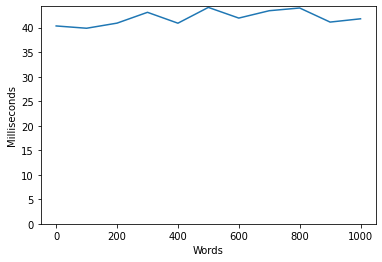

In [41]:
#q30
plot_size_time('4e4128313b8d5b5e5d04f2e8e585f64f7c5831a4')

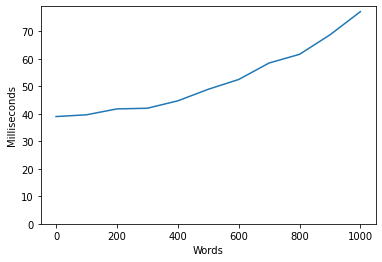

In [42]:
#q31
plot_size_time('f37e610ce055a3d894baac2d9449e6eb77c72320')

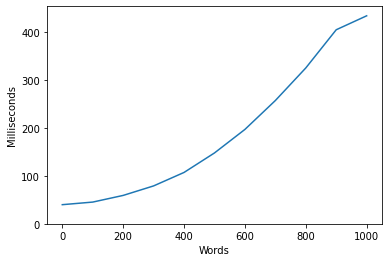

In [43]:
#q32
plot_size_time('6f5ca9327e986315ffcacddce5d9d6195c0913b')